# Credit Dataset

Raihana Fawaz (1103210102)

In [3]:
# Import Library

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

In [4]:
# Load Dataset
df = pd.read_csv('CreditDataset.csv')

# Menampilkan 5 Baris Pertama Dataset
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
# Memberikan informasi pada dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


**Preprocessing Data**

In [23]:
# Identifikasi kolom kategorikal dan numerik
# Mendapatkan kolom kategorikal berdasarkan tipe data 'object'
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [24]:
# Mendapatkan kolom numerik dengan mengecualikan tipe data 'object'
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

In [25]:
# One-hot encoding untuk fitur kategorikal
# Membuat objek OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [26]:
# Melakukan fit dan transformasi pada data kategorikal
encoded_data = encoder.fit_transform(X[categorical_cols])

In [27]:
# Membuat DataFrame untuk data hasil encoding
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

In [28]:
# Gabungkan fitur yang sudah di-encode dengan fitur numerik
# Menggabungkan data numerik asli dengan data hasil encoding secara horizontal
X = pd.concat([X[numerical_cols], encoded_df], axis=1)

In [29]:
# Normalisasi fitur menggunakan StandardScaler
# Membuat objek StandardScaler
scaler = StandardScaler()

In [30]:
# Melakukan fit dan transformasi pada fitur numerik
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [31]:
# Membagi dataset menjadi data latih dan uji
# Membagi dataset menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Membuat model SVM**

In [32]:
# Melatih model SVR
# Membuat model SVR dengan kernel linear
svr_model = SVR(kernel='linear', C=1.0)

In [33]:
# Melatih model SVR menggunakan data latih
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

**Regression Report**

In [34]:
# Membuat prediksi pada data uji
y_pred = svr_model.predict(X_test)

In [35]:
# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared

In [36]:
# Membuat laporan regresi
regression_report = {
    "Mean Squared Error (MSE)": mse,
    "Mean Absolute Error (MAE)": mae,
    "R-squared (R2)": r2
}

In [37]:
# Tampilkan laporan regresi
print("Regression Report:")
for metric, value in regression_report.items():
    print(f"{metric}: {value:.4f}")

Regression Report:
Mean Squared Error (MSE): 0.1909
Mean Absolute Error (MAE): 0.3112
R-squared (R2): 0.0821


**Visualisasi**

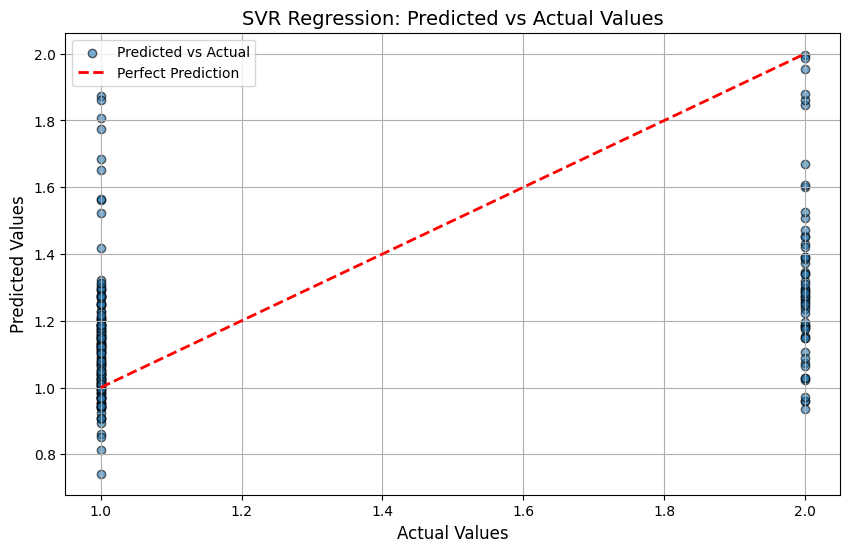

In [41]:
import matplotlib.pyplot as plt

# Plot nilai aktual vs prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

# Tambahkan label dan judul
plt.title("SVR Regression: Predicted vs Actual Values", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Insight: Visualisasi hasil prediksi menunjukkan bahwa sebagian besar prediksi model SVR terkumpul pada dua area utama, yaitu di sekitar nilai aktual 1 dan 2. Hal ini menunjukkan bahwa model menghasilkan prediksi yang cenderung seragam untuk nilai target tertentu. Namun, terlihat jelas bahwa banyak prediksi yang tidak mendekati garis referensi "Perfect Prediction," yang seharusnya menunjukkan kesesuaian sempurna antara nilai prediksi dan nilai aktual. Penyimpangan ini mengindikasikan bahwa model kesulitan untuk menangkap hubungan kompleks antara fitur dan target.